### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

#### 4. Small Worlds

# Lecture 15: Small World Random Graphs

The fact that random networks tend to have low transitivity and clustering necessitates a new kind of (random) network model
that is better at mimicking real world networks.
One idea, developped by Watts and Strogatz in 1998, is to start with some regular network that
naturally has a high clustering, and then to randomly distort its edges.

In [1]:
import networkx as nx
opts = { "with_labels": True, "node_color": 'y' }

###  Lattices, Line Graphs, Circle Graphs

A **triangular lattice** is (a finite porition of) a regular tiling of the Euclidean plane by triangles.
Here, each (inner) vertex has $6$ neighbors, which are linked in a cycle, giving
a node clustering coefficient of $6/\binom{6}{2} = 2/5 = 0.4$.

A rectangular finite region of a triangular lattice with $m$ strips of $n$ triangles of constant height
can be generated with the command `nx.triangular_lattice_graph(m, n)`

In [2]:
G = nx.triangular_lattice_graph(5, 7)
nx.draw(G, **opts)

In [3]:
nx.clustering(G)

{(0, 0): 1.0,
 (1, 0): 0.5,
 (2, 0): 0.5,
 (3, 0): 0.5,
 (4, 0): 1.0,
 (0, 1): 0.4,
 (1, 1): 0.4,
 (2, 1): 0.4,
 (3, 1): 0.4,
 (0, 2): 0.6666666666666666,
 (1, 2): 0.4,
 (2, 2): 0.4,
 (3, 2): 0.4,
 (4, 2): 0.6666666666666666,
 (0, 3): 0.4,
 (1, 3): 0.4,
 (2, 3): 0.4,
 (3, 3): 0.4,
 (0, 4): 0.6666666666666666,
 (1, 4): 0.4,
 (2, 4): 0.4,
 (3, 4): 0.4,
 (4, 4): 0.6666666666666666,
 (0, 5): 0.6666666666666666,
 (1, 5): 0.5,
 (2, 5): 0.5,
 (3, 5): 0.6666666666666666}

In [4]:
nx.average_clustering(G)

0.5222222222222223

However, other kinds of lattice graphs contain no triangles at all!

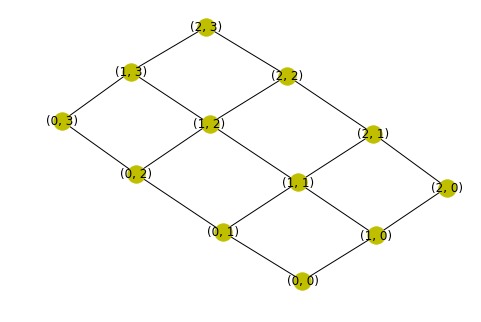

In [5]:
G = nx.grid_2d_graph(3, 4)
nx.draw(G, with_labels=True, node_color='y')

In [6]:
nx.clustering(G)

{(0, 0): 0,
 (0, 1): 0,
 (0, 2): 0,
 (0, 3): 0,
 (1, 0): 0,
 (1, 1): 0,
 (1, 2): 0,
 (1, 3): 0,
 (2, 0): 0,
 (2, 1): 0,
 (2, 2): 0,
 (2, 3): 0}

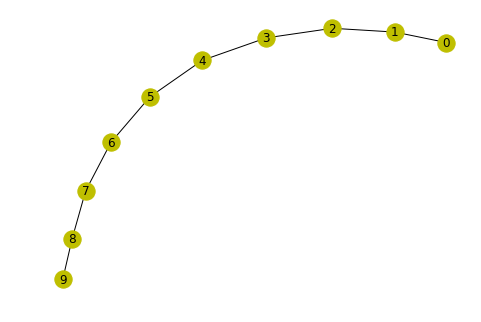

In [7]:
n = 10
G = nx.path_graph(n)
nx.draw(G, **opts)

In [8]:
nx.clustering(G)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

**Idea:** in a path graph with $n$ vertices, additionally connect each node to all nodes not further than $d$
steps away ...

0.6333333333333333


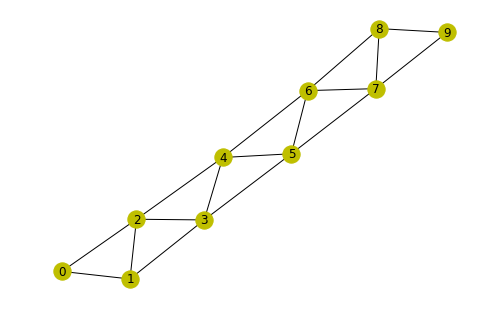

In [9]:
for v in range(n-2):
    G.add_edge(v, v+2)
nx.draw(G, **opts)
print(nx.average_clustering(G))

0.7466666666666666


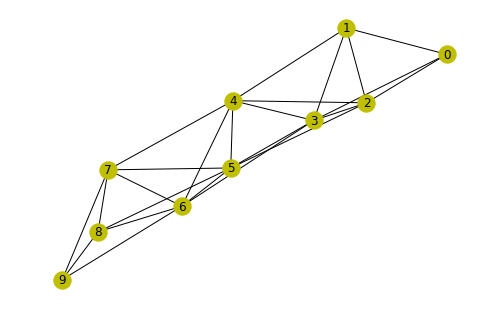

In [10]:
for v in range(n-3):
    G.add_edge(v, v+3)
nx.draw(G, **opts)
print(nx.average_clustering(G))

Or, same thing on a cycle ...

0.0
2.7777777777777777


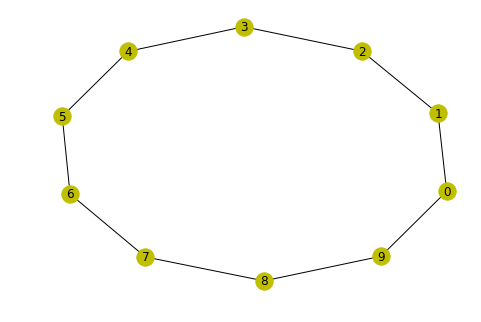

In [11]:
n = 10
G = nx.cycle_graph(n)
nx.draw(G, **opts)
print(nx.average_clustering(G))
print(nx.average_shortest_path_length(G))

0.5
1.6666666666666667


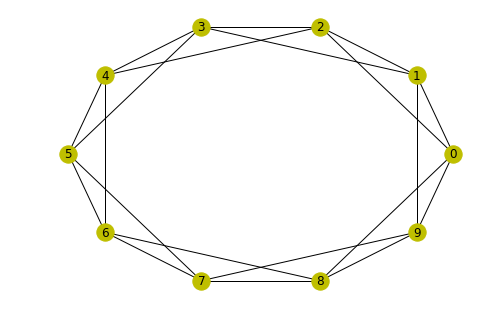

In [12]:
for v in G:
    G.add_edge(v, (v+2) % n)
nx.draw_circular(G, **opts)
print(nx.average_clustering(G))
print(nx.average_shortest_path_length(G))

0.5999999999999999
1.3333333333333333


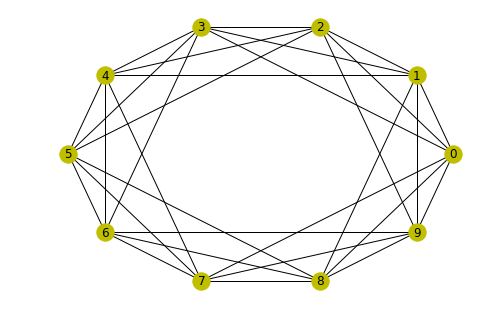

In [13]:
for v in G:
    G.add_edge(v, (v+3) % n)
nx.draw_circular(G, **opts)
print(nx.average_clustering(G))
print(nx.average_shortest_path_length(G))

<div class ="alert alert-warning">

**Definition (Circle Graph).** For $1 < d < n/2$, an $(n, d)$-**circle graph**
is obtained from a cycle on $n$ vertices by additionally linking each node
to all nodes that are not more than $d$ steps away on the cycle.
</div>

In [14]:
def circle_graph(n, d):
    G = nx.cycle_graph(n)
    for v in G:
        for o in range(2, d+1):
            G.add_edge(v, (v+o) % n)
    return G

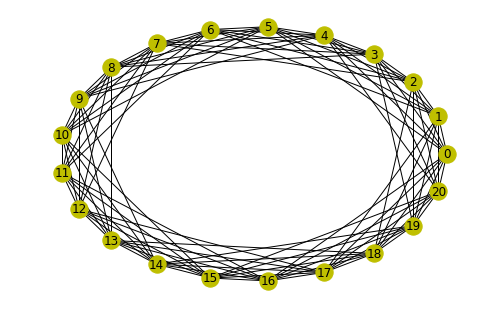

In [15]:
G = circle_graph(21, 5)
nx.draw_circular(G, **opts)

In [16]:
print(nx.average_clustering(G))
print(nx.average_shortest_path_length(G))

0.6666666666666664
1.5


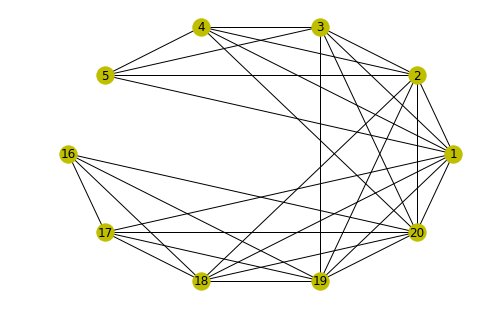

In [17]:
N = G.neighbors(0)
S = nx.subgraph(G, list(N))
nx.draw_circular(S, **opts)

In [18]:
S.degree()

DegreeView({1: 8, 2: 7, 3: 6, 4: 5, 5: 4, 16: 4, 17: 5, 18: 6, 19: 7, 20: 8})

In [19]:
S.size()

30

* An $(n, d)$-circle graph has $n$ nodes and $m = nd$ edges.

* Each node has degree $\frac{2m}{n} = 2d$.

* The social graph of each node has
$$\sum_{k=0}^{d-1} ((d-1)+k) = \frac{3}{2}d(d-1)$$ 
edges.

* The graph clustering coefficient of an $(n, d)$-circle graph is
$$
C = \frac{3d - 3}{4d - 2} \to \frac34 \text{, as } d \to \infty.
$$
In particular:
$$
\begin{array}{l|rrrrr}
d & 1 & 2 & 3 & 4 & 5 \\ \hline
C & 0 & 0.5 & 0.6 & 0.643 & 0.667
\end{array}
$$

* The characteristic path length of an $(n, d)$-circle graph is
approximately
$$
L \approx \frac{n}{4d},
$$
growing linearly with $n$ (for fixed $d$).

In conclusion, such regular graphs have high clustering but long shortest paths,
hence $(n, d)$-circle graphs do not exhibit the small world behaviour.

The following modification of the circle graph was suggested by Duncan J. Watts and Steven Strogatz ([1998](https://en.wikipedia.org/wiki/Watts%E2%80%93Strogatz_model)).

<div class="alert alert-warning">

**Definition (The WS Model).**
Let $1 < d < n/2$ and $0\leq p \leq 1$.  An $(n, d, p)$-WS graph $G = (X, E)$ is constructed from
an $(n, d)$-circle graph $G_0 = (X, E_0)$ by rewiring each of the edges in $E_0$ with probability $p$,
as follows:

1. visit the nodes $X = \{0, \dots, n{-}1\}$ in turn ('clockwise').

2. for each node $i \in X$ consider the $d$ edges connecting $i$ to $j$
in a clockwise sense ($j = i+1, \dots, i+d$).

3. With probability $p$, in the edge $(i, j)$ replace
$j$ by node $k \in X$ chosen uniformly at random, subject to
  * $k \neq i$, and
  * $(i, k)$ must not be an edge of $G$ already.
</div>

In [20]:
import random as rd
def ws_graph(n, d, p):
    G = circle_graph(n, d)
    for v in G:
        for o in range(1, d+1):
            if rd.random() < p:
                w = rd.randint(0,n-1)
                if w != v and not G.has_edge(v, w):
                    G.remove_edge(v, (v+o) % n)
                    G.add_edge(v, w)
    return G

0.5408163265306122
2.0047619047619047
(21, 63)


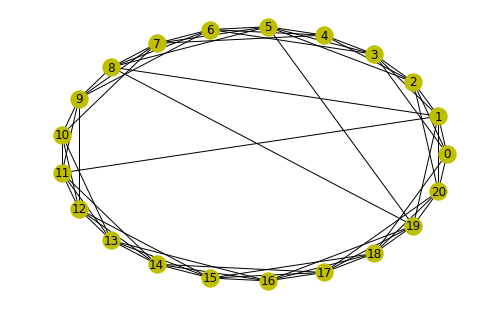

In [21]:
n, d = 21, 3
G = ws_graph(n, d, 0.1)
nx.draw_circular(G, **opts)
print(nx.average_clustering(G))
print(nx.average_shortest_path_length(G))
print((G.order(), G.size()))

0.5210884353741496
2.019047619047619
(21, 63)


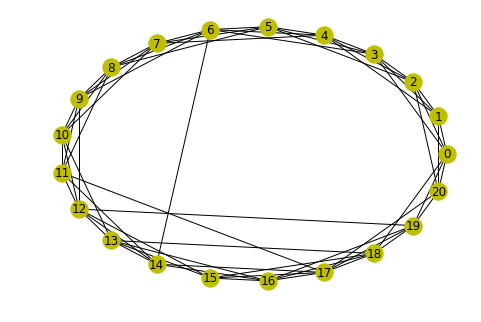

In [22]:
G = ws_graph(n, d, 0.2)
nx.draw_circular(G, **opts)
print(nx.average_clustering(G))
print(nx.average_shortest_path_length(G))
print((G.order(), G.size()))

0.43560090702947846
1.938095238095238
(21, 63)


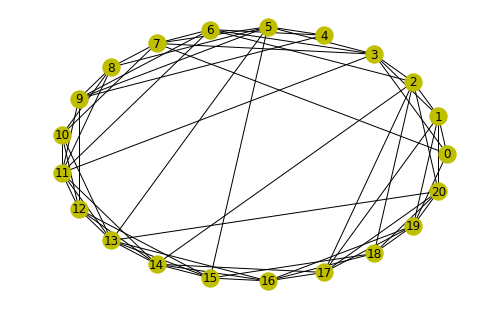

In [23]:
G = ws_graph(n, d, 0.3)
nx.draw_circular(G, **opts)
print(nx.average_clustering(G))
print(nx.average_shortest_path_length(G))
print((G.order(), G.size()))

0.3171957671957672
1.8047619047619048
(21, 63)


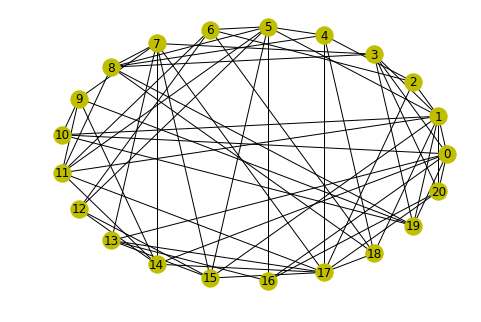

In [24]:
G = ws_graph(n, d, 1)
nx.draw_circular(G, **opts)
print(nx.average_clustering(G))
print(nx.average_shortest_path_length(G))
print((G.order(), G.size()))

A WS graph with parameters $(n, d, p)$ can be generated with the command `nx.watts_strogatz_graph(n, 2*d, p)`.

0.5999999999999999
2.2


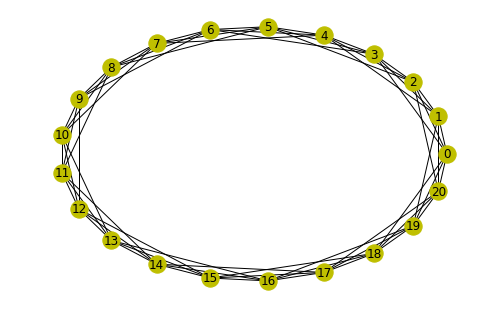

In [25]:
n, d = 21, 3 
G = nx.watts_strogatz_graph(n, 2*d, 0)
nx.draw_circular(G, **opts)
print(nx.average_clustering(G))
print(nx.average_shortest_path_length(G))

0.5131519274376415
2.038095238095238


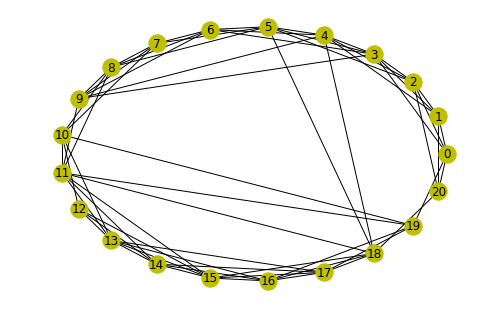

In [26]:
G = nx.watts_strogatz_graph(n, 2*d, 0.1)
nx.draw_circular(G, **opts)
print(nx.average_clustering(G))
print(nx.average_shortest_path_length(G))

0.3095238095238095
1.838095238095238


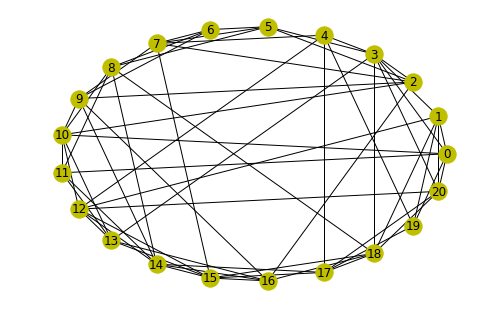

In [27]:
G = nx.watts_strogatz_graph(n, 2*d, 0.2)
nx.draw_circular(G, **opts)
print(nx.average_clustering(G))
print(nx.average_shortest_path_length(G))

## Code Corner

### `random`

* `randint`: [[doc]](https://docs.python.org/2/library/random.html#random.randint) random integer

### `networkx`

* `triangular_lattice_graph`: [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.lattice.triangular_lattice_graph.html)


* `grid_2d_graph`: [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.lattice.grid_2d_graph.html)


* `grid_graph`: [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.lattice.grid_graph.html)


* `path_graph`: [[doc]](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.generators.classic.path_graph.html)


* `cycle_graph`: [[doc]](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.generators.classic.cycle_graph.html)


* `circulant_graph`: [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.circulant_graph.html)


* `watts_strogatz_graph`: [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html)


* `draw_circular`: [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_circular.html)

##  Exercises

1. Design an experiment with random graphs to verify the predicted graph clustering coefficient.

1. In terms of the parameters, $n$, $d$ and $p$, what is the clustering coefficient $C$ of an $(n, d, p)$-WS graph?

1. In terms of the parameters, $n$, $d$ and $p$, what is the average shortest path length $L$  of an $(n, d, p)$-WS graph?